In [42]:
import perionet.perionet as pn
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

PerodicNet
---

In [43]:
in_t = tf.placeholder(tf.float32, [None, 1])
out_t = pn.perioNet(in_t, 10)

lab_t = tf.placeholder(tf.float32, [None, 1])
error_t = tf.losses.mean_squared_error(lab_t, out_t)
opt_t = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(error_t)



Classic Net
---

In [44]:
h_t = tf.layers.dense(in_t, 60, activation=tf.math.sigmoid, use_bias=True)
outc_t = tf.layers.dense(h_t, 1, activation=None, use_bias=True)
errorc_t = tf.losses.mean_squared_error(lab_t, outc_t)
optc_t = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(errorc_t)

In [45]:
S = tf.Session()
def train(data, labels, epochs):
    data = np.array(data).reshape(-1, 1)
    labels = np.array(labels).reshape(-1, 1)
    for _ in range(epochs):
        S.run((opt_t, optc_t), feed_dict={in_t: data, lab_t: labels})

def pred(data, labels):
    data = np.array(data).reshape(-1, 1)
    labels = np.array(labels).reshape(-1, 1)
    perodi, err_periodi, classico, err_classico = S.run((out_t, error_t, outc_t, errorc_t), feed_dict={in_t: data, lab_t: labels})
    return perodi.reshape(-1), err_periodi, classico.reshape(-1), err_classico


In [49]:
def F(x) -> float:
    return 1 / (x + 1e-5) + 1 / (x - 1 + 1e-5)

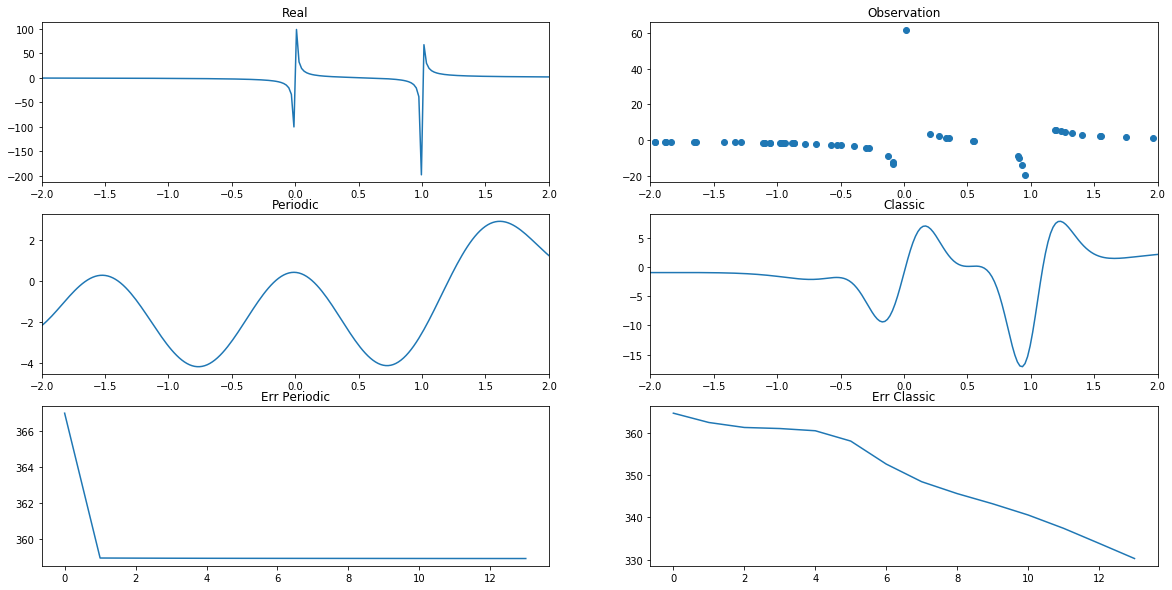

KeyboardInterrupt: 

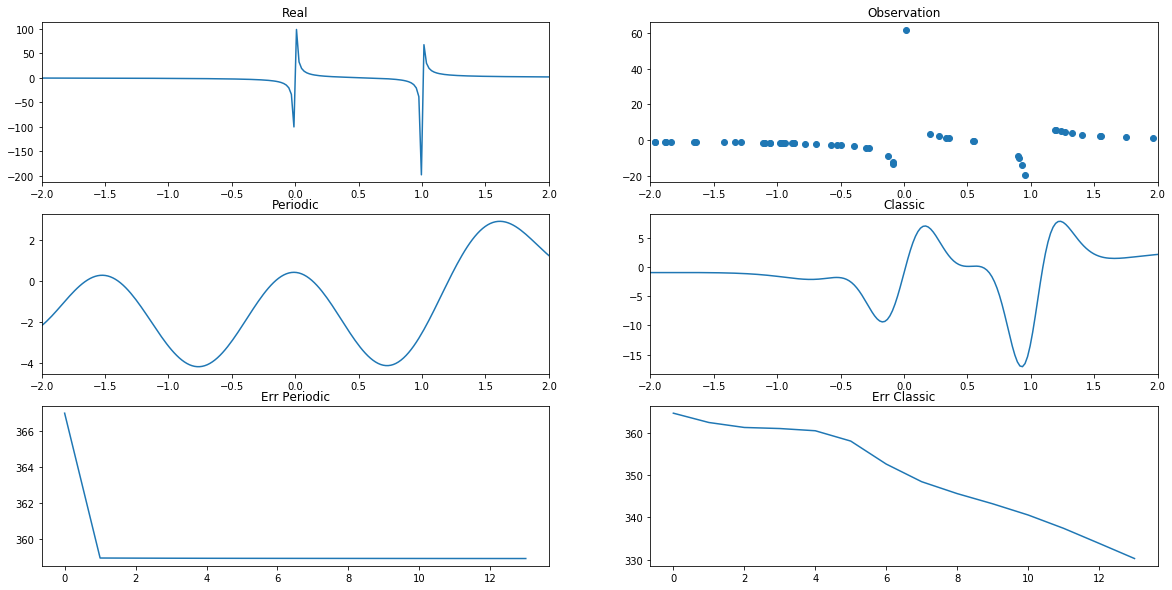

In [50]:
from IPython import display
import time

S.run(tf.global_variables_initializer())
mini, maxi = -2, 2
initial = 40
total = 20

fig, ((real, obs), (periodi, classic), (err_periodi, err_classic)) = plt.subplots(3, 2, figsize=(20, 10))

samples = []
labels = []

iters = []
errs_periodi = []
errs_classic = []

X = np.linspace(mini, maxi, 200)
Y = F(X)


real.set_xlim([mini, maxi])
real.plot(X, Y)
real.set_title("Real")

for _ in range(initial):
    x = mini + np.random.rand() * (maxi - mini)
    samples.append(x)
    labels.append(F(x))
    

it = 0
def do_stuff():
    global samples, labels, iters, errs_periodi, errs_classic, X, Y, real, obs, periodi, classic, err_periodi, err_classic, it
    
    obs.cla()
    periodi.cla()
    classic.cla()
    err_periodi.cla()
    err_classic.cla()
    
    obs.set_xlim([mini, maxi])
    periodi.set_xlim([mini, maxi])
    classic.set_xlim([mini, maxi])
    
    obs.set_title("Observation")
    periodi.set_title("Periodic")
    classic.set_title("Classic")
    err_periodi.set_title("Err Periodic")
    err_classic.set_title("Err Classic")
    display.clear_output(wait=True)
    
    
    samples, labels = zip(*sorted(zip(samples, labels), key=lambda x: x[0]))
    
    samples = list(samples)
    labels = list(labels)

    obs.scatter(samples, labels)
    
    y_periodi, err_periodio, y_classico, err_classico = pred(X, Y)
    

    errs_periodi.append(err_periodio)
    errs_classic.append(err_classico)
    iters.append(it)
    
    err_periodi.plot(iters, errs_periodi)

    periodi.plot(X, y_periodi)
    classic.plot(X, y_classico)
    err_classic.plot(iters, errs_classic)
    
    display.display(fig)
    x = mini + np.random.rand() * (maxi - mini)
    samples.append(x)
    labels.append(F(x))
    
    it += 1

do_stuff()
#time.sleep(15)
for _ in range(total):
    train(samples, labels, 1000)
    
    do_stuff()
    time.sleep(0.1)
    

